In [1]:
%matplotlib inline

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plotpar = {'axes.labelsize': 30,
                  'font.size': 22,
                  'legend.fontsize': 15,
                  'xtick.labelsize': 30,
                  'ytick.labelsize': 30,
                  'text.usetex': True}
plt.rcParams.update(plotpar)

In [16]:
act = pd.read_csv("../data/ageact_mod.csv")
act["kepid"] = np.array([float(i) for i in act["#KIC"].values])
act

,#KIC,Teff,Teff_err,[M/H],[M/H]_err,Sindex,S/N,Age[Gyr],Age_err+,Age_err-,Source,kepid
0,1435467,6326.0,77.000,0.010,0.100,0.1461,12.78,3.0164,0.4951,0.3513,LEGACY,1435467.0
1,2837475,6614.0,77.000,0.010,0.100,0.1400,12.60,1.6270,0.1118,0.1757,LEGACY,2837475.0
2,2852862,6008.1,69.276,-0.155,0.100,0.1260,27.88,4.5070,0.3910,0.3390,APOGEE,2852862.0
3,3223000,5851.5,69.276,-0.185,0.100,0.1986,50.82,8.9810,2.0300,1.6650,APOGEE,3223000.0
4,3424541,6278.9,69.276,0.270,0.100,0.1505,11.28,1.5230,0.1290,0.1160,APOGEE,3424541.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120,12069424,5825.0,50.000,0.100,0.030,0.1484,99.90,6.6735,0.8145,0.7666,LEGACY,12069424.0
121,12069449,5750.0,50.000,0.050,0.020,0.1536,99.90,7.3922,0.8943,0.9103,LEGACY,12069449.0
122,12258514,5964.0,77.000,-0.000,0.100,0.1420,25.71,4.0544,0.1757,0.1597,LEGACY,12258514.0
123,12265063,5708.3,69.276,-0.268,0.101,0.1281,11.20,10.6800,1.4020,1.3240,APOGEE,12265063.0


In [14]:
from astropy.io import fits

gaia_file = "/Users/rangus/projects/data/kepler_dr2_1arcsec.fits"

with fits.open(gaia_file) as data:
    gaia = pd.DataFrame(data[1].data, dtype="float64")
    
df = pd.merge(act, gaia, how="left", on="kepid")
print(np.shape(act), np.shape(gaia), np.shape(df))

(125, 12) (197090, 101) (127, 112)


Just look at stars with Solar like Teffs.

In [34]:
m = (5000 < df.Teff.values) & (df.Teff.values < 6000)

In [38]:
bprp = df.phot_bp_mean_mag.values - df.phot_rp_mean_mag.values
age_err = .5*(df["Age_err+"].values + df["Age_err-"].values)

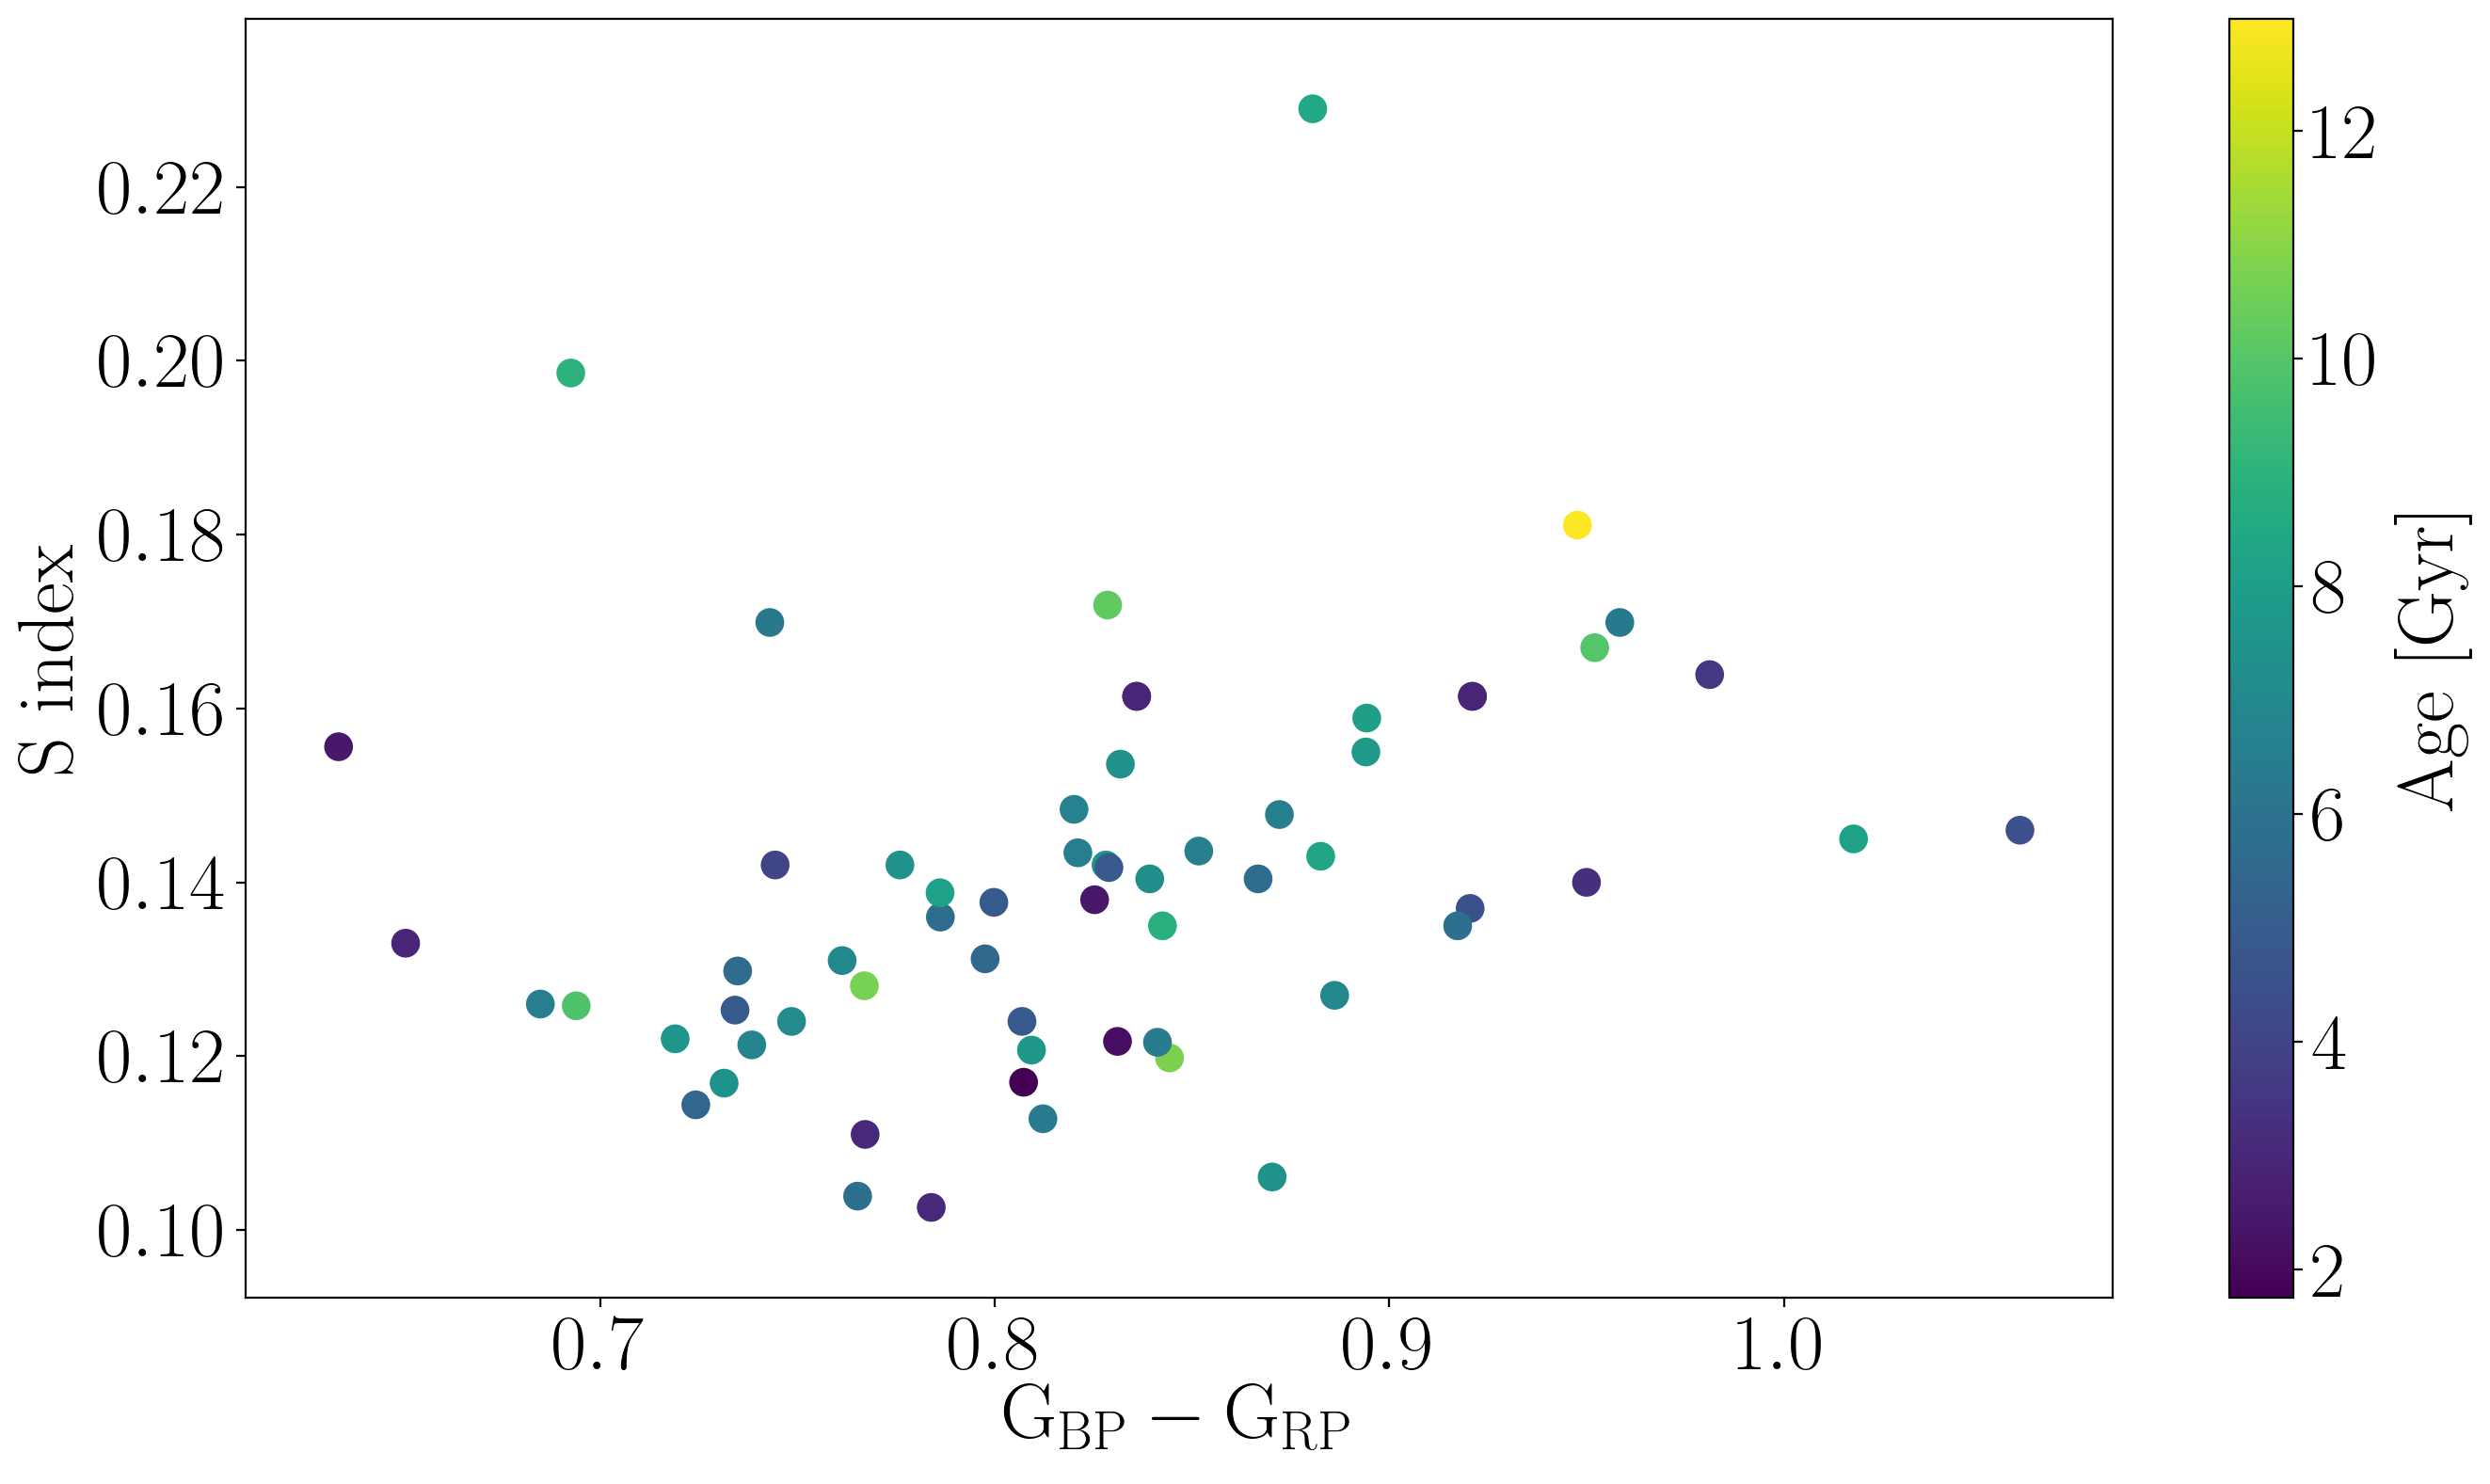

In [30]:
plt.figure(figsize=(16, 9), dpi=200)
# plt.errorbar(df.phot_bp_mean_mag - df.phot_rp_mean_mag, df.Sindex, yerr=)
plt.scatter(bprp[m], df.Sindex.values[m], c=df["Age[Gyr]"][m], s=100)
plt.colorbar(label="$\mathrm{Age~[Gyr]}$")
plt.xlabel("$\mathrm{G_{BP} - G_{RP}}$")
plt.ylabel("$\mathrm{S~index}$");

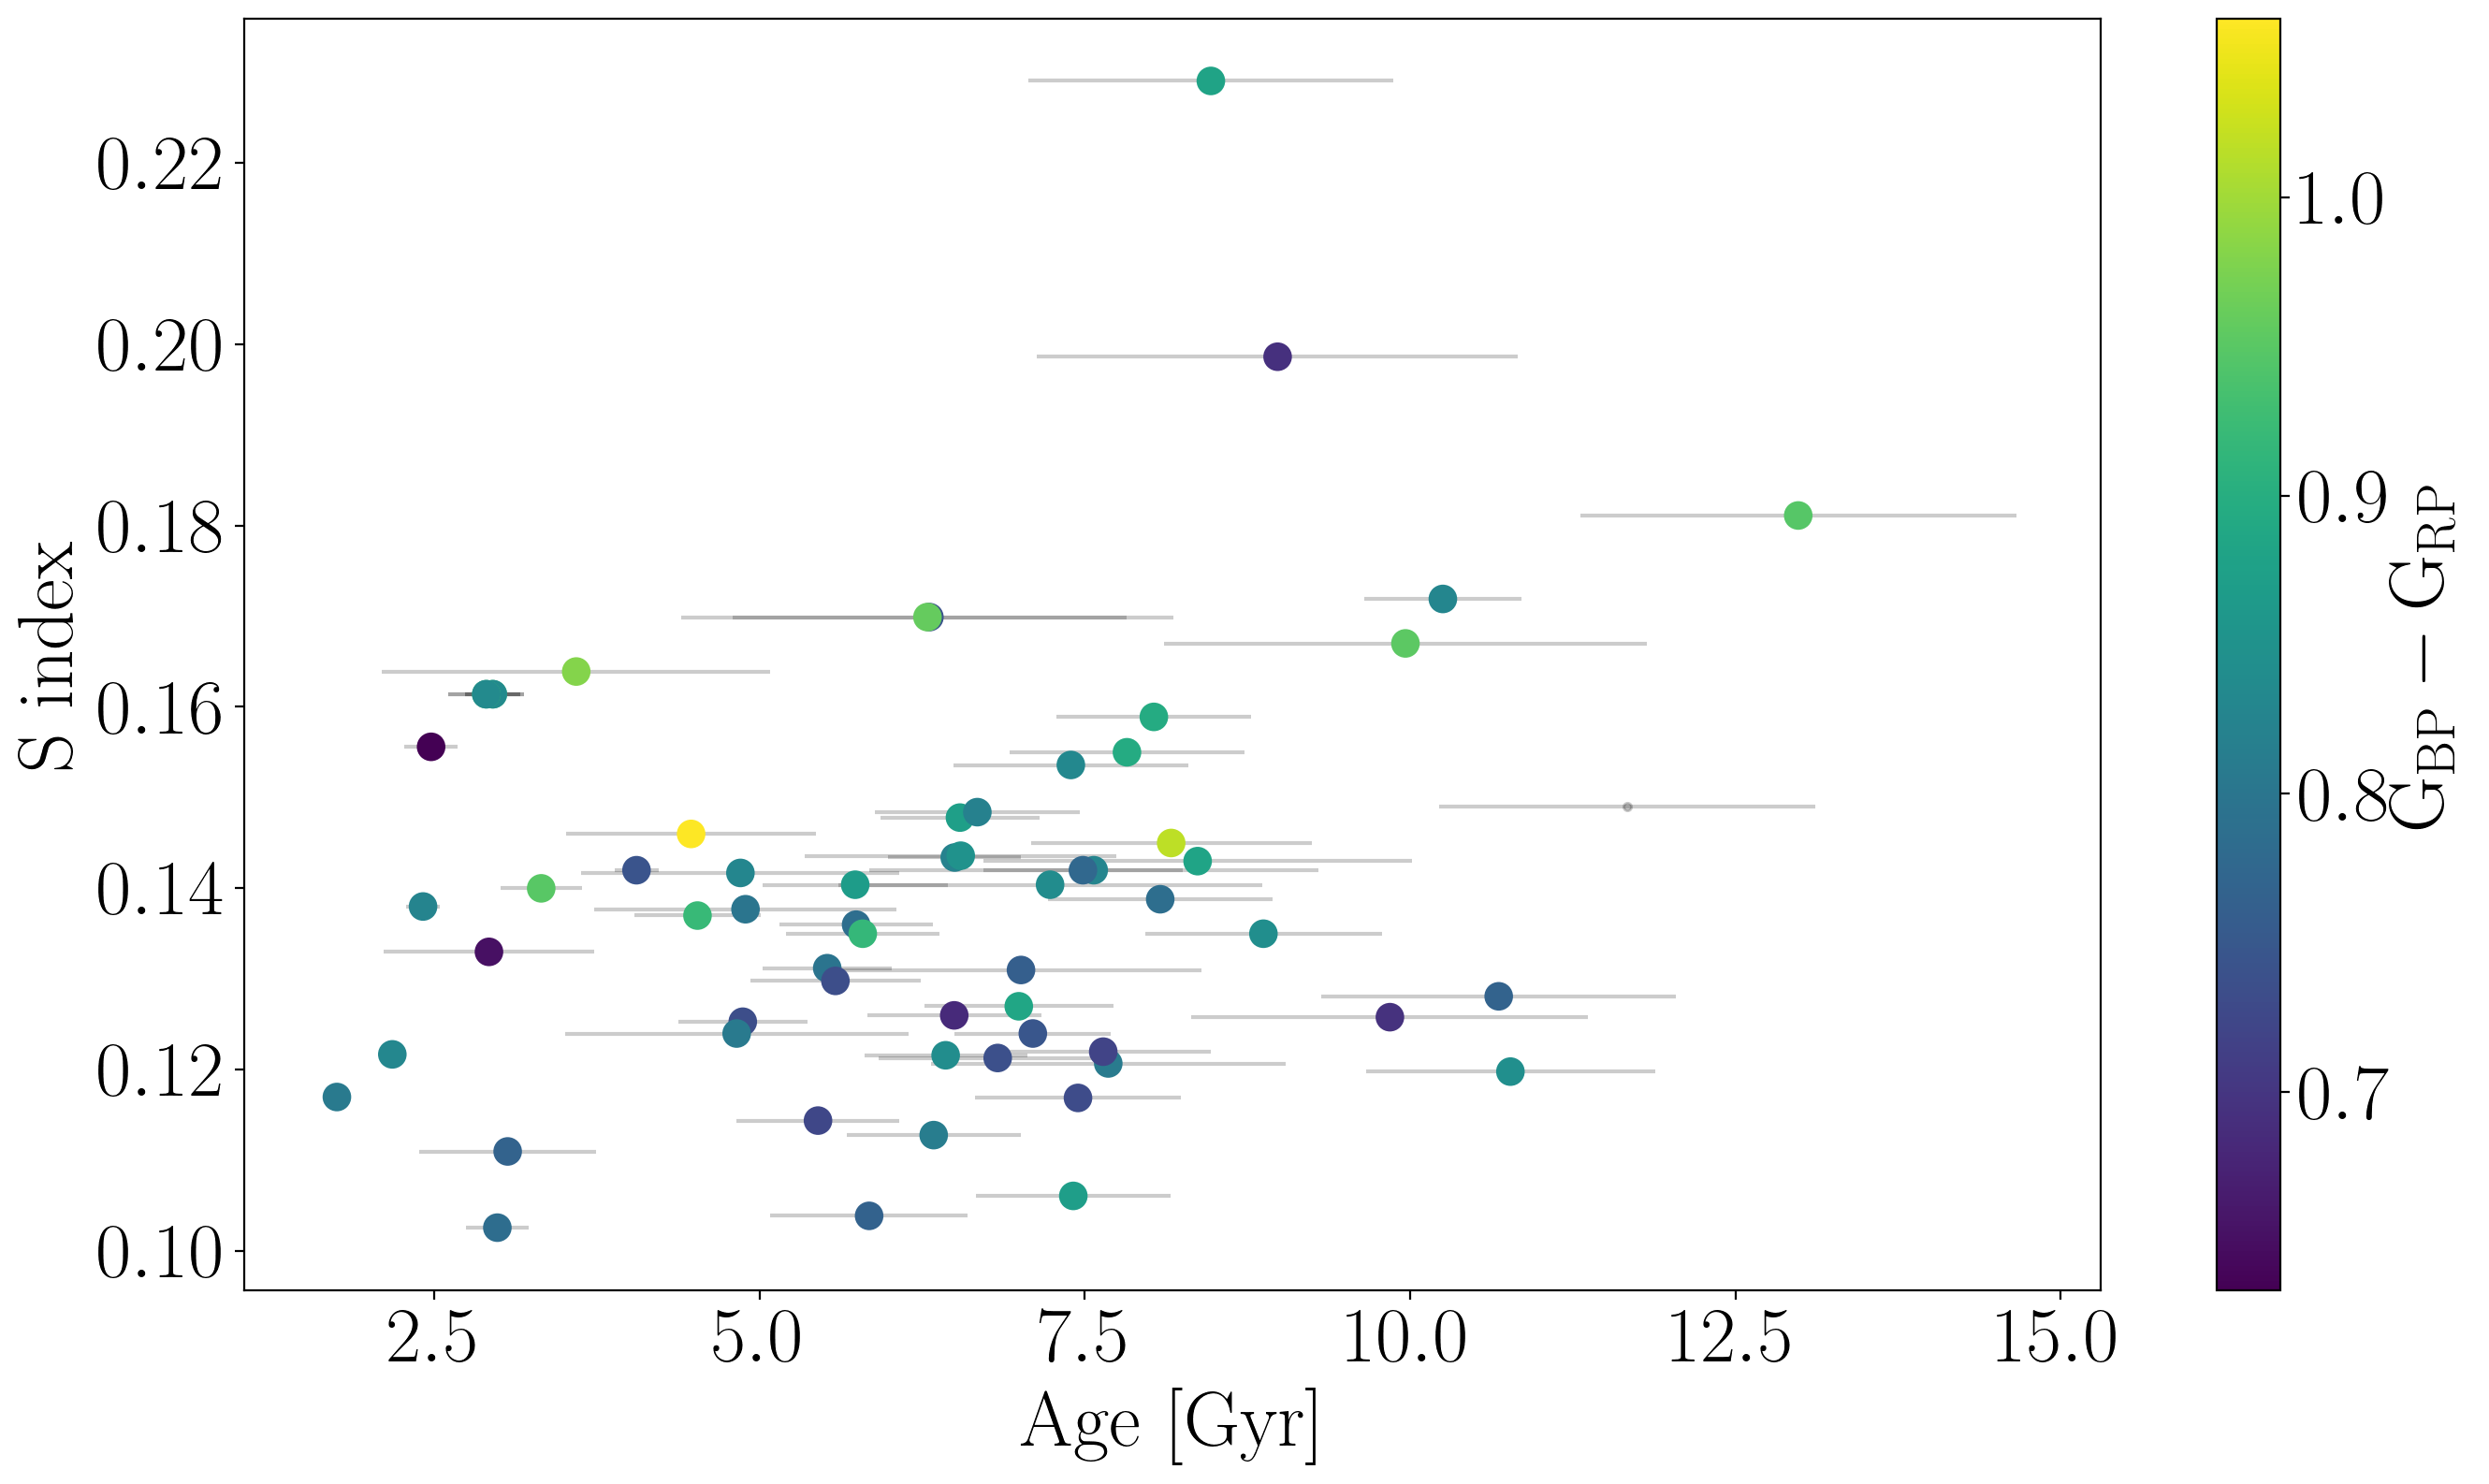

In [39]:
plt.figure(figsize=(16, 9), dpi=200)
plt.errorbar(df["Age[Gyr]"].values[m], df.Sindex.values[m], xerr=age_err[m], alpha=.2, fmt="k.", zorder=0)
plt.scatter(df["Age[Gyr]"].values[m], df.Sindex.values[m], c=bprp[m], s=100, zorder=1)
plt.colorbar(label="$\mathrm{G_{BP} - G_{RP}}$")
plt.xlabel("$\mathrm{Age~[Gyr]}$")
plt.ylabel("$\mathrm{S~index}$");